In [17]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# read file and store to numpy array
data = pd.read_csv('data_minibatch.csv', header=None)
print(data)
A = data[0]
B = data[1]
C = data[2]
print(A.shape, B.shape, C.shape)

           0        1        2
0    0.98399  1.17540  0.39813
1    0.10123  0.39774  0.25644
2   -0.36271  1.95120  0.22003
3   -0.73883 -0.90466  1.71140
4   -1.47980 -0.68215  1.20580
..       ...      ...      ...
195  0.16164 -1.44730  0.18435
196  1.97790 -0.98828  0.40200
197  0.79527  0.94938  0.53923
198  1.03740  0.35122  0.73359
199  2.36030 -0.87228  0.26837

[200 rows x 3 columns]
(200,) (200,) (200,)


In [19]:
def f(x):
    return np.sum(A + (B * x) + (1/2 * (C * math.pow(x,2))))

In [20]:
def f_gradient(x):
    return np.sum(B + (C * x))

In [21]:
def f_hessian():
    return np.sum(C)

In [22]:
# 2.1 
# f(x) is Lipchitz continiously differentiable if L > 0
L = np.sum(np.abs(C))
print('L: {:.3f}'.format(L))
if L > 0:
    print('f(x) is Lipchitz continiously differentiable')
print('Range of step size: 0 < t < {:.3f}\n'.format(2/L))

# find x*, p*
x_opt = -np.sum(B)/np.sum(C)
print('x* is {:.3f} (hessian of f(x*) = {:.3f})'.format(x_opt, f_hessian()))
p_opt = f(x_opt)
print('p* is {:.3f}'.format(p_opt))

L: 166.644
f(x) is Lipchitz continiously differentiable
Range of step size: 0 < t < 0.012

x* is -0.115 (hessian of f(x*) = 166.644)
p* is -0.441


In [23]:
def search_direction(x, k, i):
    b = B[i:i+k]
    c = C[i:i+k]
    return - np.sum(b + (c * x))

In [24]:
def mini_batch(N,k,t):
    epoch = 5
    # initial x_previous
    x_prev = 1   
    f_hist = [f(x_prev)]
    for e in range(epoch):
        i = 0
        for n in range(1,N//k + 1):
            x = x_prev + (t * (search_direction(x_prev, k, i)))   
            f_hist.append(f(x))    
            x_prev = x
            i += k
    return f_hist

In [25]:
# 2.2
def result(N,t):
    print('step size:', t)
    plt.figure(figsize=(15, 10))

    k = N #batch_size
    f_hist = mini_batch(N,k,t)
    plt.plot([x/(N//k) for x in range(len(f_hist))], f_hist,marker='D', markersize=3, label='batch optimization')

    k = 1 #batch_size
    f_hist_1 = mini_batch(N,k,t)
    plt.plot([x/(N//k) for x in range(len(f_hist_1))], f_hist_1,marker='.', markersize=3, label='batch size = 1')

    k = 20 #batch_size
    f_hist_20 = mini_batch(N,k,t)
    plt.plot([x/(N//k) for x in range(len(f_hist_20))], f_hist_20,marker='*', markersize=3, label='batch size = 20')

    k = 50 #batch_size
    f_hist_50 = mini_batch(N,k,t)
    plt.plot([x/(N//k) for x in range(len(f_hist_50))], f_hist_50,marker='P', markersize=3, label='batch size = 50')
    plt.xlabel("epoch")
    plt.ylabel("Objective value")
    plt.legend(loc='upper right')
    plt.show()

step size: 0.01


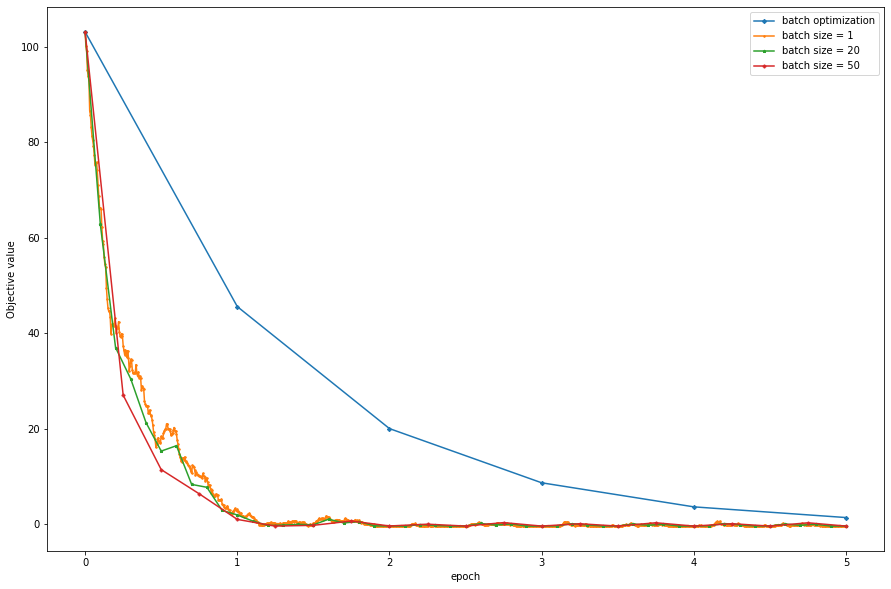

In [26]:
N = A.shape[0]
t = 0.01
result(N, t)

step size: 0.005


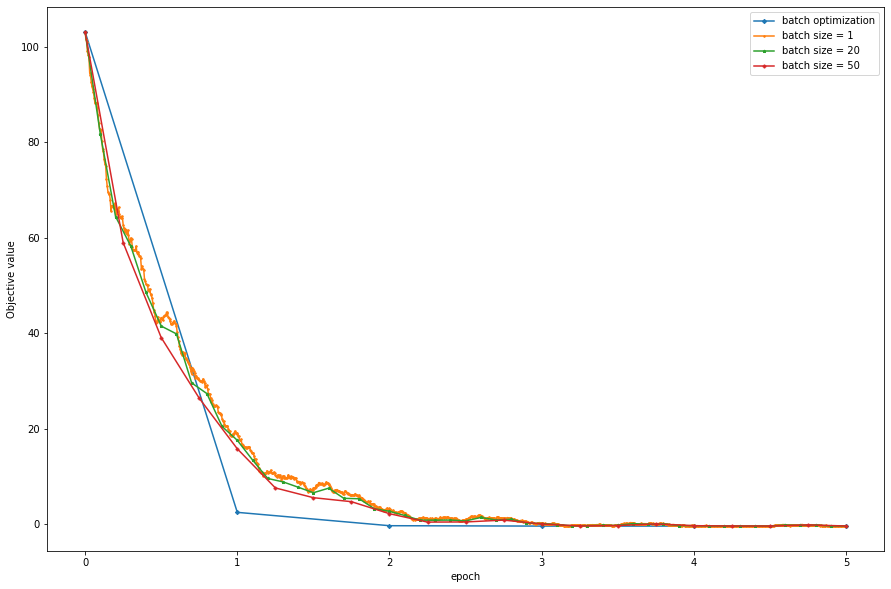

In [27]:
N = A.shape[0]
t = 0.005
result(N, t)